In [1]:
import pandas as pd

positive_frame = pd.read_csv('./data/data_positive_hash.csv', index_col=0)
negative_frame = pd.read_csv('./data/data_negative_hash.csv', index_col=0)

Imports the positive and negative datasets

In [2]:
import numpy as np

X = np.concatenate((np.array(positive_frame), np.array(negative_frame)), axis=0)
y = np.zeros(len(X))
y[:len(positive_frame)] = 1

Generates the labels for the total dataset

In [3]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=10)
model.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Trains a linear SVM on the data

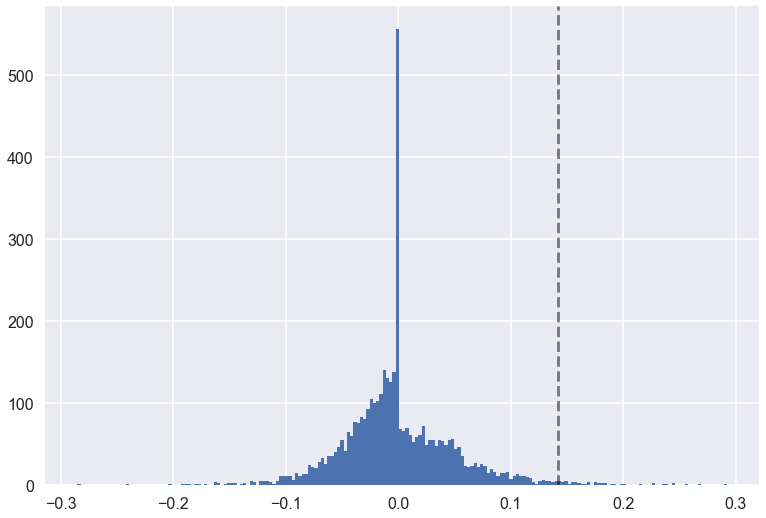

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

plt.hist(model.coef_[0], bins=200)
plt.axvline(model.coef_[0][np.argsort(model.coef_[0])[-50]], c='k', alpha=0.5, linestyle='--')
plt.show()

Plots the distribution of SVM weights in the total matrix of weights. The dashed line is the lower bound of the top 50 positive 6-mers

In [61]:
lower_bound = -15
trunc_coef = np.array(model.coef_.T)
trunc_coef[np.argsort(model.coef_[0])[:lower_bound]] = 0

Makes a new truncated coefficient matrix with only the top 50 6-mers

In [62]:
decision = [np.matmul(trunc_coef.T, np.array(X[i,:], ndmin=2).T)[0] for i in range(len(y))]

These are the SVM metrics calculated for each data point

In [63]:
test_range = np.arange(np.ceil(np.max(decision)), np.floor(np.min(decision)) - 1, -0.1)

Makes a range of cutoff values to plot later

In [64]:
def roc_values(cutoff, X):
    results = (cutoff < decision).astype(int)
    positive = results[y == 1]
    true_positive = np.sum(positive)/len(positive)
    negative = results[y == 0]
    false_positive = np.sum(negative)/len(negative)
    return([false_positive, true_positive])

Finds the True positive and False positive rate for each of the cutoff values

In [65]:
to_plot = np.array([roc_values(i, X) for i in test_range])

Makes a matrix to be plotted

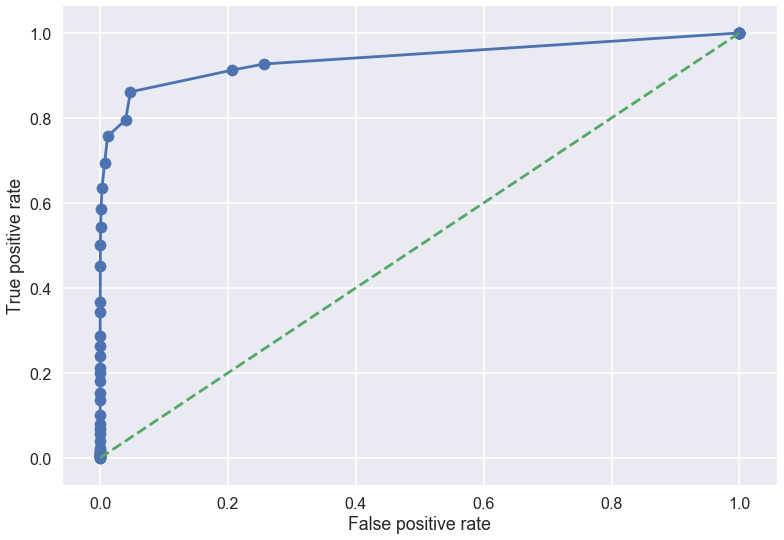

In [66]:
plt.scatter(to_plot[:, 0], to_plot[:, 1])
plt.plot(to_plot[:, 0], to_plot[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

Plots an ROC curve of the fit

In [67]:
positive_frame.columns[np.argsort(model.coef_[0])[lower_bound:]].tolist()

['GACATT',
 'TCAAGC',
 'ACAATC',
 'ACACGA',
 'AAGACA',
 'ACTCAA',
 'AACACA',
 'ATGGAA',
 'ACGAAA',
 'CGGATG',
 'TCGGAT',
 'AGGAAT',
 'ATCGGA',
 'CATCGG',
 'AATGGC']

These are the top and only 6-mers used for the fit. All other 6-mers have weights of 0 within the SVM